# Time Series Analysis on Stock Price

In [2]:
# Import packages
import bs4 as bs
import requests
import yfinance as yf
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
import seaborn as sns 
sns.set_style("dark")


## Download stock data from Yahoo Finance

In [26]:
bank_tickers = ['JPM', 'BAC', 'WFC', 'MS', 'HSBC', 'RY', 'GS', 'TD']

In [3]:
# Download stock data of past 20 years from yahoo finance

start = datetime.datetime(2003,1,1)
end = datetime.datetime(2023,4,1)
bank_stock = yf.download(bank_tickers, start=start, end=end, interval = '1d')

[*********************100%***********************]  8 of 8 completed


In [5]:
bank_stock.head()

Adj Close                                                        \
                  BAC         GS       HSBC        JPM         MS        RY   
Date                                                                          
2003-01-02  21.949945  52.764973  20.656130  14.395320  23.272638  8.531053   
2003-01-03  21.813301  53.317997  20.902828  14.678248  23.228249  8.627298   
2003-01-06  22.126961  55.302856  21.109016  15.832584  23.855307  8.746449   
2003-01-07  22.161121  55.075584  20.766588  15.753373  23.982925  8.734997   
2003-01-08  22.071058  53.727081  20.692965  15.147902  23.386003  8.485226   

                                     Close             ...    Open             \
                  TD        WFC        BAC         GS  ...      TD        WFC   
Date                                                   ...                      
2003-01-02  5.087502  13.742735  35.340000  69.650002  ...  10.875  23.575001   
2003-01-03  5.147490  13.550333  35.119999  70.379997  ...  11.075  24.025000   
2003-01-06  5.242086  13.819124  35.625000  73.000000  ...  11.155  23.900000   
2003-01-07  5.216707  13.734243  35.680000  72.699997  ...  11.360  24.424999   
2003-01-08  5.156716  13.539013  35.535000  70.919998  ...  11.295  24.275000   

              Volume                                                       \
                 BAC       GS     HSBC       JPM       MS      RY      TD   
Date                                                                        
2003-01-02  12584000  4025400  1081700  16739100  4310700   75400   86200   
2003-01-03   7803400  2342800  1114900  12525700  2963100  101400  120800   
2003-01-06  12500600  4337600  2100600  22932400  4167300  312000   71800   
2003-01-07   9804800  4606900  1609100  17837500  5213800  234200   85800   
2003-01-08   8487600  3265200   889000  15857300  4054600  178000   77000   

                     
                WFC  
Date                 
2003-01-02  9904200  
2003-01-03  7808000  
2003-01-06  8097400  
2003-01-07  6556200  
2003-01-08  8071000  

[5 rows x 48 columns]

In [6]:
# adjust column names

bank_stock.columns = [' '.join(col).strip() for col in bank_stock.columns.values]
bank_stock.columns

Index(['Adj Close BAC', 'Adj Close GS', 'Adj Close HSBC', 'Adj Close JPM',
       'Adj Close MS', 'Adj Close RY', 'Adj Close TD', 'Adj Close WFC',
       'Close BAC', 'Close GS', 'Close HSBC', 'Close JPM', 'Close MS',
       'Close RY', 'Close TD', 'Close WFC', 'High BAC', 'High GS', 'High HSBC',
       'High JPM', 'High MS', 'High RY', 'High TD', 'High WFC', 'Low BAC',
       'Low GS', 'Low HSBC', 'Low JPM', 'Low MS', 'Low RY', 'Low TD',
       'Low WFC', 'Open BAC', 'Open GS', 'Open HSBC', 'Open JPM', 'Open MS',
       'Open RY', 'Open TD', 'Open WFC', 'Volume BAC', 'Volume GS',
       'Volume HSBC', 'Volume JPM', 'Volume MS', 'Volume RY', 'Volume TD',
       'Volume WFC'],
      dtype='object')

## Save stock into csv file

In [10]:
# save df to csv
bank_stock.to_csv('megabank_stock.csv')

# Load Time Series dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset

bank_df = pd.read_csv('/content/drive/MyDrive/TimeSeries/megabank_stock.csv', index_col=0)
bank_df.head()

,Adj Close BAC,Adj Close GS,Adj Close HSBC,Adj Close JPM,Adj Close MS,Adj Close RY,Adj Close TD,Adj Close WFC,Close BAC,Close GS,...,Open TD,Open WFC,Volume BAC,Volume GS,Volume HSBC,Volume JPM,Volume MS,Volume RY,Volume TD,Volume WFC
Date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,21.949945,52.764973,20.656130,14.395320,23.272638,8.531053,5.087502,13.742735,35.340000,69.650002,...,10.875,23.575001,12584000,4025400,1081700,16739100,4310700,75400,86200,9904200
2003-01-03,21.813301,53.317997,20.902828,14.678248,23.228249,8.627298,5.147490,13.550333,35.119999,70.379997,...,11.075,24.025000,7803400,2342800,1114900,12525700,2963100,101400,120800,7808000
2003-01-06,22.126961,55.302856,21.109016,15.832584,23.855307,8.746449,5.242086,13.819124,35.625000,73.000000,...,11.155,23.900000,12500600,4337600,2100600,22932400,4167300,312000,71800,8097400
2003-01-07,22.161121,55.075584,20.766588,15.753373,23.982925,8.734997,5.216707,13.734243,35.680000,72.699997,...,11.360,24.424999,9804800,4606900,1609100,17837500,5213800,234200,85800,6556200
2003-01-08,22.071058,53.727081,20.692965,15.147902,23.386003,8.485226,5.156716,13.539013,35.535000,70.919998,...,11.295,24.275000,8487600,3265200,889000,15857300,4054600,178000,77000,8071000


In [6]:
# select columns of interest
bank_df = bank_df.iloc[:, bank_df.columns.str.contains('Adj Close|Volume', regex=True)]

# convert index column to datetime
bank_df.index = pd.to_datetime(bank_df.index, format = "%Y-%m-%d")
bank_df.index

DatetimeIndex(['2003-01-02', '2003-01-03', '2003-01-06', '2003-01-07',
               '2003-01-08', '2003-01-09', '2003-01-10', '2003-01-13',
               '2003-01-14', '2003-01-15',
               ...
               '2023-03-20', '2023-03-21', '2023-03-22', '2023-03-23',
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31'],
              dtype='datetime64[ns]', name='Date', length=5097, freq=None)

In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5097 entries, 2003-01-02 to 2023-03-31
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close BAC   5097 non-null   float64
 1   Adj Close GS    5097 non-null   float64
 2   Adj Close HSBC  5097 non-null   float64
 3   Adj Close JPM   5097 non-null   float64
 4   Adj Close MS    5097 non-null   float64
 5   Adj Close RY    5097 non-null   float64
 6   Adj Close TD    5097 non-null   float64
 7   Adj Close WFC   5097 non-null   float64
 8   Volume BAC      5097 non-null   int64  
 9   Volume GS       5097 non-null   int64  
 10  Volume HSBC     5097 non-null   int64  
 11  Volume JPM      5097 non-null   int64  
 12  Volume MS       5097 non-null   int64  
 13  Volume RY       5097 non-null   int64  
 14  Volume TD       5097 non-null   int64  
 15  Volume WFC      5097 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 676.9 KB


In [8]:
# understand the dataset range
bank_df.describe()

,Adj Close BAC,Adj Close GS,Adj Close HSBC,Adj Close JPM,Adj Close MS,Adj Close RY,Adj Close TD,Adj Close WFC,Volume BAC,Volume GS,Volume HSBC,Volume JPM,Volume MS,Volume RY,Volume TD,Volume WFC
count,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5097.000000,5.097000e+03,5.097000e+03,5.097000e+03,5.097000e+03,5.097000e+03,5.097000e+03,5.097000e+03,5.097000e+03
mean,22.415554,159.770948,30.627981,55.759608,36.162837,44.108514,30.303442,30.385847,9.162929e+07,5.580000e+06,1.965864e+06,2.197290e+07,1.333295e+07,7.943833e+05,1.375560e+06,2.649778e+07
std,10.458204,77.997108,5.992032,38.941856,20.319265,24.807766,17.431159,12.151274,1.028184e+08,6.305158e+06,1.523509e+06,1.962235e+07,1.305234e+07,6.608760e+05,1.260451e+06,2.769021e+07
min,2.612259,41.506355,11.729780,11.172245,6.941239,8.129460,4.829088,5.724355,2.400800e+06,4.677000e+05,6.460000e+04,1.347300e+06,1.025100e+06,2.590000e+04,1.200000e+04,1.774000e+06
25%,12.965334,105.939995,26.579273,26.735840,22.652409,25.408239,16.087597,19.597174,3.016440e+07,2.598500e+06,9.298000e+05,1.073830e+07,6.439000e+06,3.412000e+05,6.074000e+05,1.236980e+07
50%,23.359056,142.172485,30.731726,35.907497,30.950527,39.928028,27.625315,24.966354,6.146090e+07,3.668500e+06,1.667400e+06,1.497970e+07,1.010960e+07,6.713000e+05,1.174700e+06,1.913090e+07
75%,30.656292,190.946396,34.349094,86.923737,42.218781,61.475632,41.367439,42.853516,1.142168e+08,5.860600e+06,2.553200e+06,2.609900e+07,1.597370e+07,1.044600e+06,1.763600e+06,3.114930e+07
max,47.945427,407.866791,45.943119,164.015747,104.018784,112.153656,80.632820,57.596661,1.226791e+09,1.145907e+08,1.680740e+07,2.172942e+08,3.297861e+08,9.830200e+06,2.552140e+07,4.787366e+08


# EDA

Performing EDA on the stock dataset to understand:
- price trend and moving average
- volume trend
- risk and return

## Stock's price change over time

To understand the stock price change over the past 20 years, would expect the significant drop during 2008 financial crisis. 

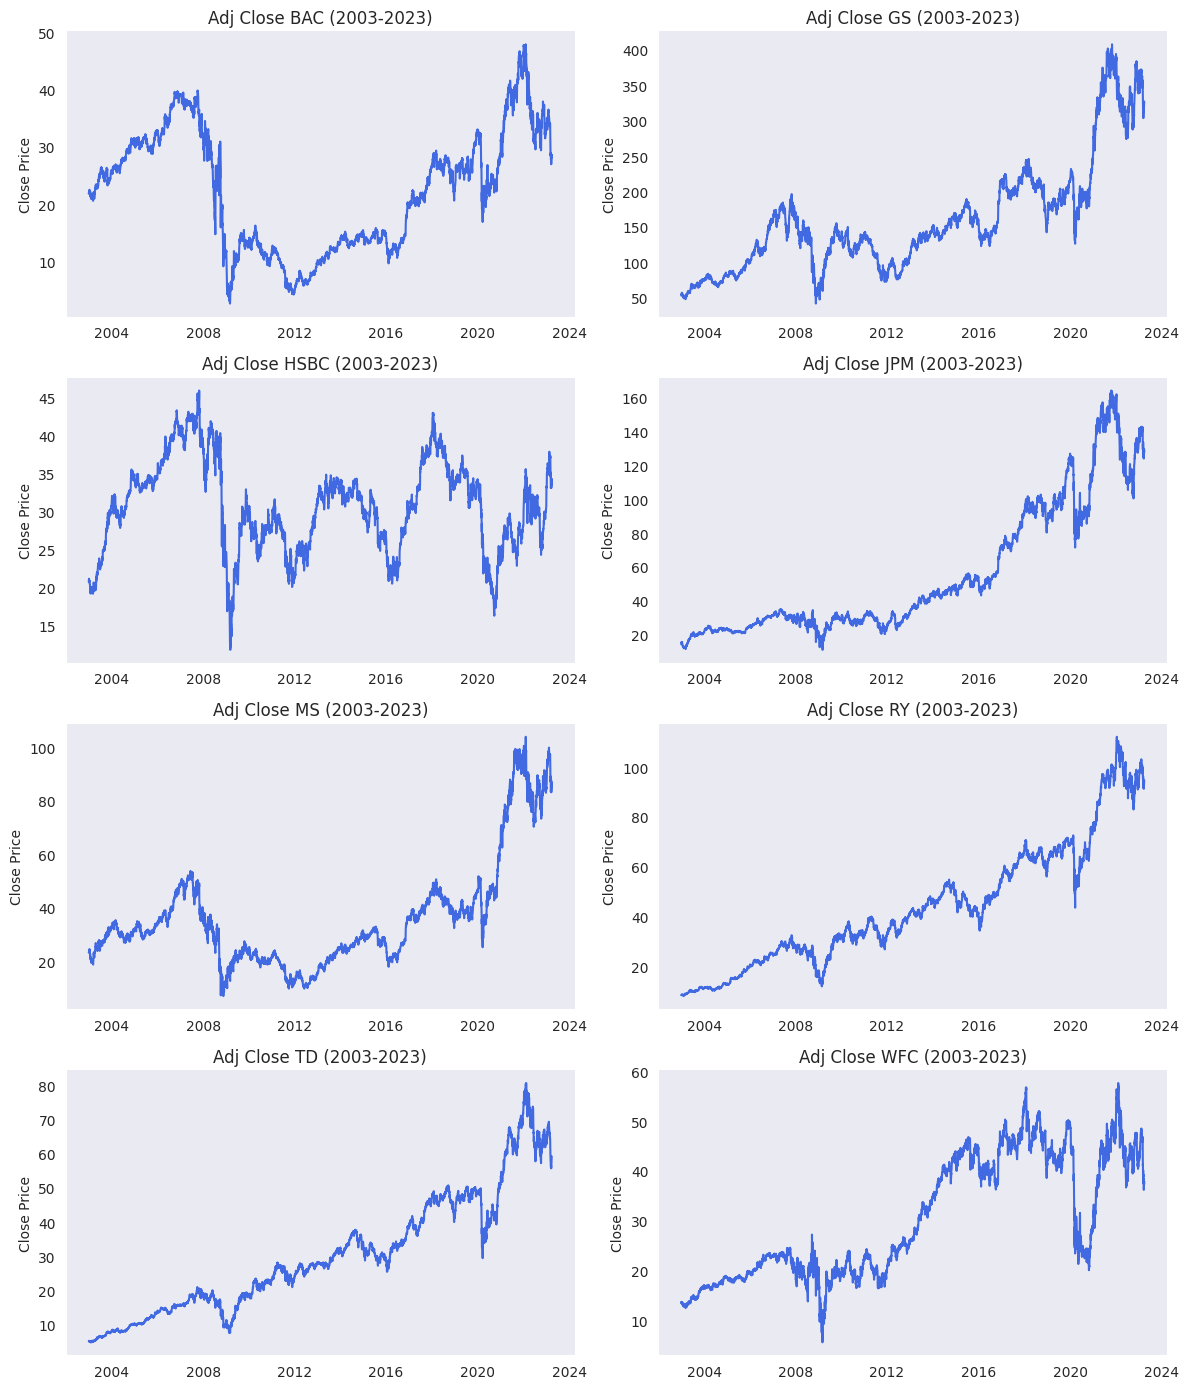

In [9]:
plt.subplots(4, 2, figsize=(12,14))

# plot the first 8 columns of adj price
for i, column in enumerate(bank_df.iloc[:, 0:8].columns, 1):
    plt.subplot(4,2,i)
    sns.lineplot(data=bank_df, x=bank_df.index, y=bank_df.loc[:, column], color = 'royalblue')
    sns.despine()
    plt.ylabel(f'Close Price')
    plt.xlabel(None)
    plt.title(f'{column} (2003-2023)')

plt.tight_layout()
plt.show()


- All banks were significantly impacted by the 2008 crisis, however, recovered fairly quickly by 2010.
- Two Canadian bank stocks grow steadily across years with lesser impact during 2008 financial crisis.


## Moving average - 30 days, 90 days since 2018

Looking at moving average of stock price to better identify the trend.

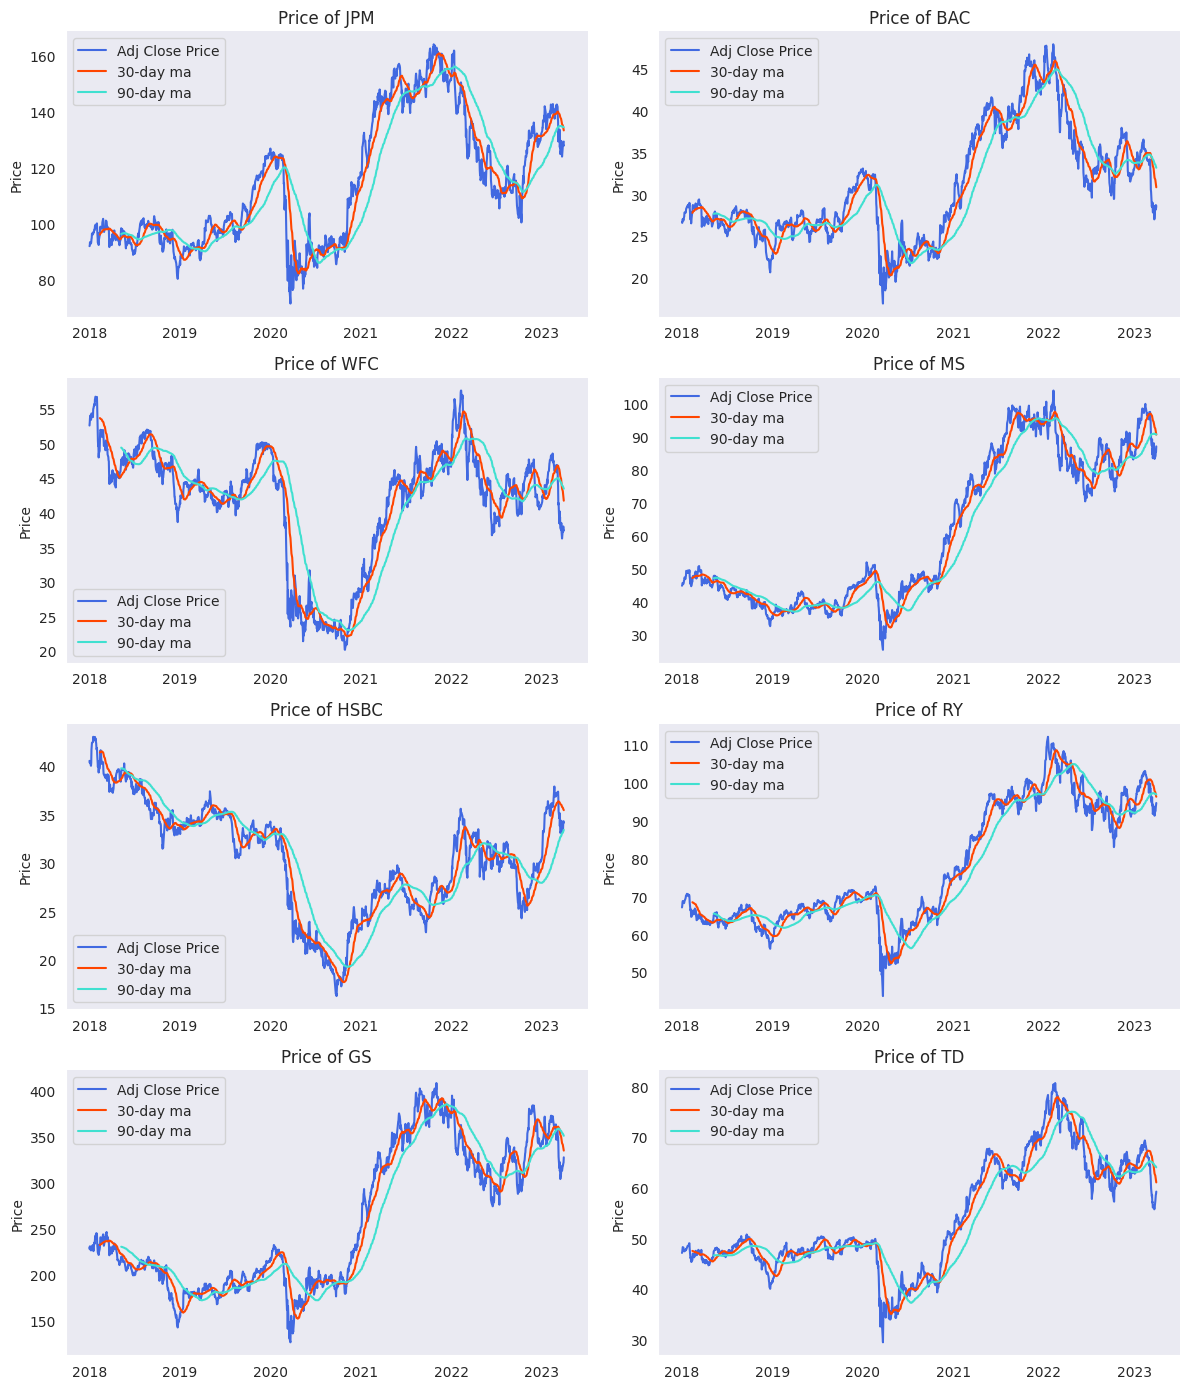

In [10]:
# select the recent data from 2018
bank_df_recent = bank_df['2018-01-01':]

plt.subplots(4, 2, figsize=(12,14))

for i, bank in enumerate(bank_tickers, 1):
    plt.subplot(4,2,i)
    sns.lineplot(x=bank_df_recent.index, y=bank_df_recent[f'Adj Close {bank}'], label = 'Adj Close Price', color = 'royalblue')
    # plot 30-day rolling average price
    sns.lineplot(x=bank_df_recent.index, y=bank_df_recent[f'Adj Close {bank}'].rolling(30).mean(), label = '30-day ma', color = 'orangered')
    # plot 90-day rolling average price
    sns.lineplot(x=bank_df_recent.index, y=bank_df_recent[f'Adj Close {bank}'].rolling(90).mean(), label = '90-day ma', color = 'turquoise')
    sns.despine()
    plt.ylabel('Price')
    plt.xlabel(None)
    plt.legend()
    plt.title(f'Price of {bank}')

plt.tight_layout()
plt.show()


## Stock's volume change over time

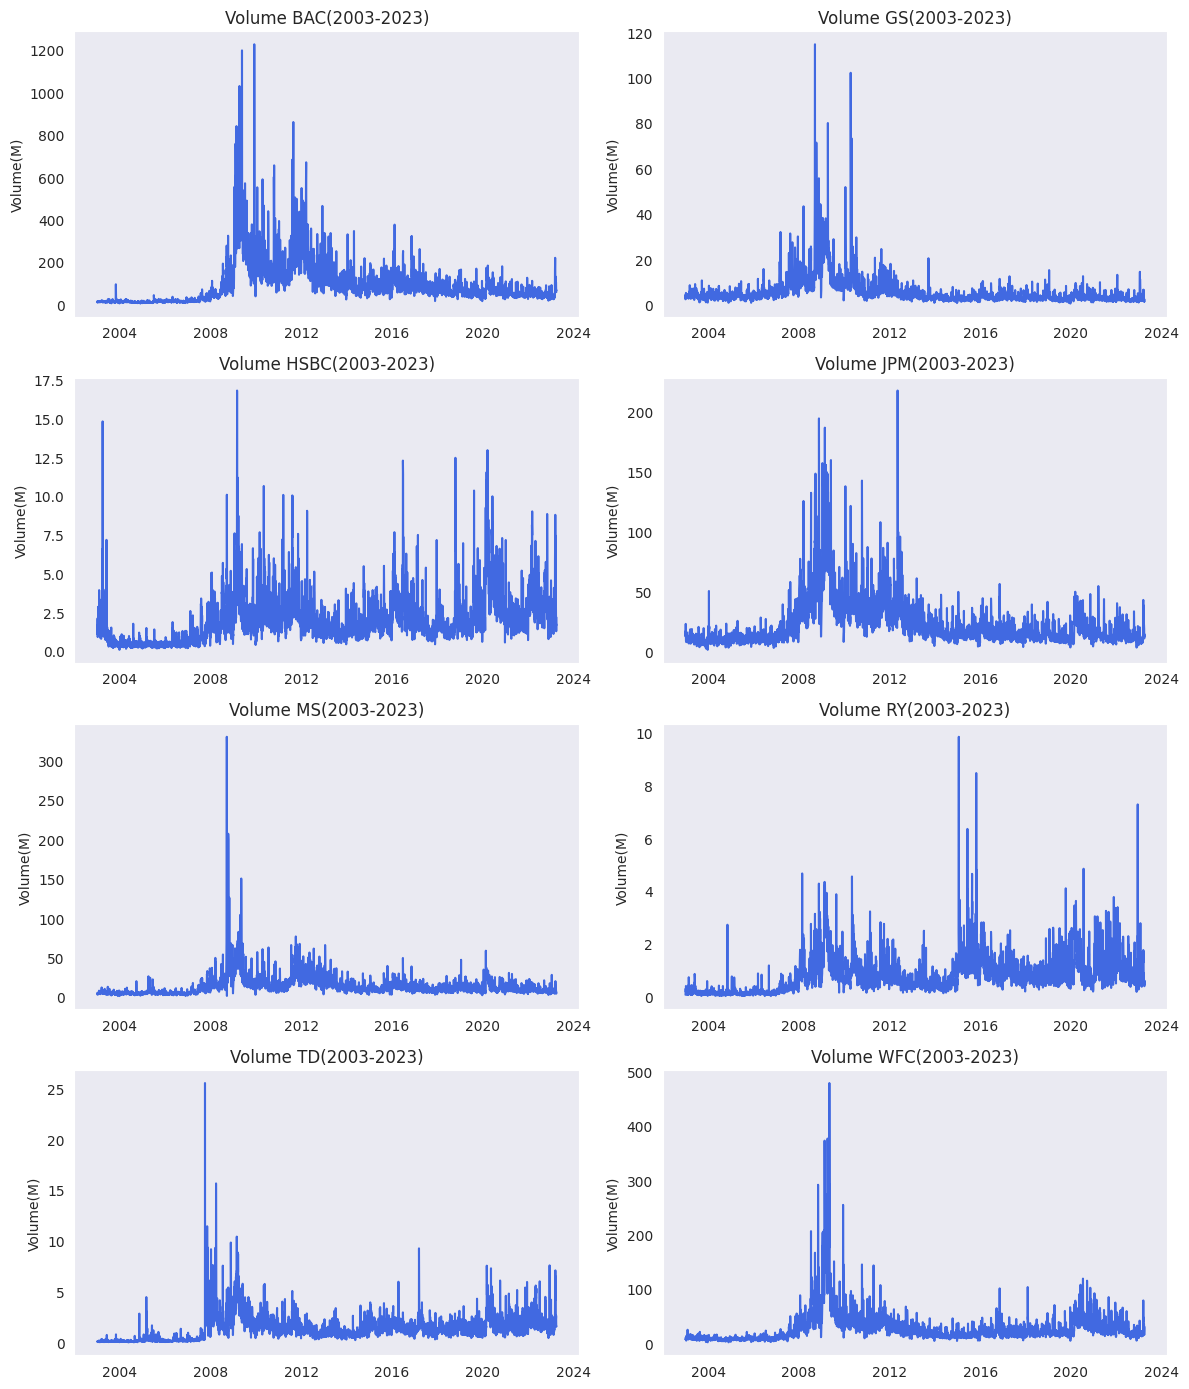

In [11]:
# plot the volumne trend

plt.subplots(4, 2, figsize=(12,14))

for i, column in enumerate(bank_df.iloc[:, 8:16].columns, 1):
    plt.subplot(4,2,i)
    sns.lineplot(data=bank_df, x=bank_df.index, y=bank_df.loc[:,column]/1000000, color = 'royalblue')
    plt.ylabel(f'Volume(M)')
    plt.xlabel(None)
    plt.title(f'{column}(2003-2023)')

plt.tight_layout()
plt.show()


There was significant  transactin volume during financial crisis, 2008 to 2009.

## Stock's return and risk

### Daily retun and risk

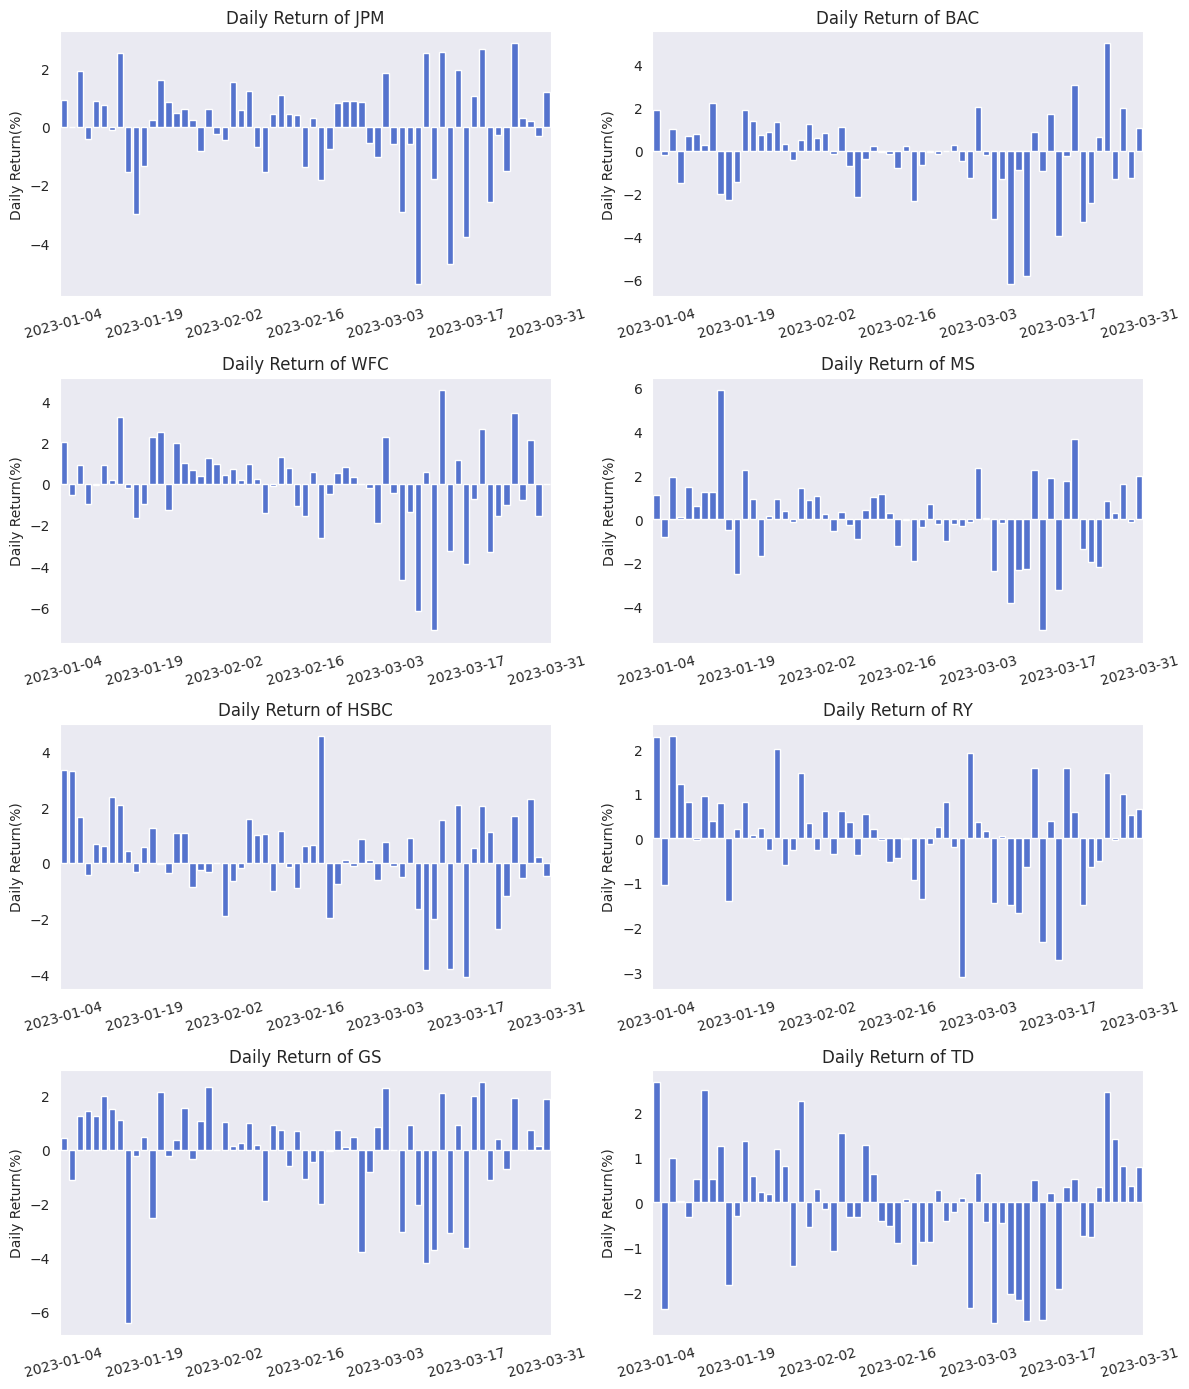

In [12]:
# select past 3 months data
bank_df_p3m = bank_df['2023-01-01':]

# calculate the daily return
bank_df_dr = bank_df_p3m.iloc[:, 0:8].pct_change().dropna()

plt.subplots(4, 2, figsize=(12,14))

for i, bank in enumerate(bank_tickers, 1):
    plt.subplot(4,2,i)
    # calculate daily return
    sns.barplot(x=bank_df_dr.index, y=bank_df_dr[f'Adj Close {bank}']*100, color='royalblue', label='Daily Return')
    plt.xticks(range(0, len(bank_df_dr.index), 10), bank_df_dr.index.date[::10], rotation=15)
    plt.ylabel('Daily Return(%)')
    plt.xlabel(None)
    plt.title(f'Daily Return of {bank}')

plt.tight_layout()
plt.show()


It shows clearly the 2023 March banking crisis including the collapse of SVB significantly impacted the price drop in the major banks. 

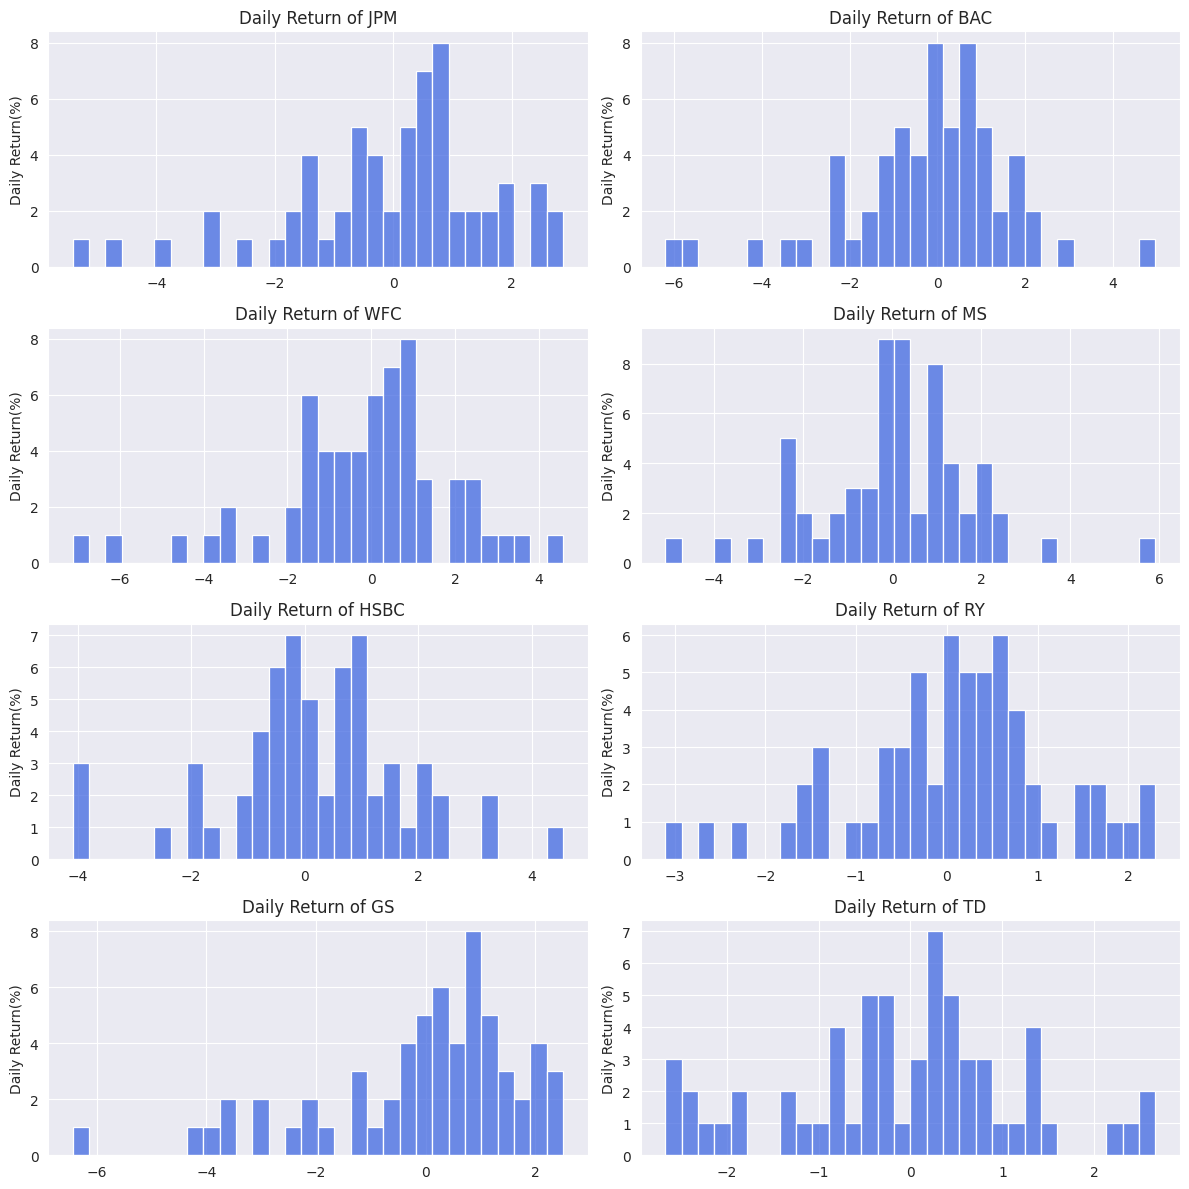

In [66]:
# further look at return distribution

plt.subplots(4, 2, figsize=(12,12))

for i, bank in enumerate(bank_tickers, 1):
    plt.subplot(4,2,i)
    # plot histogram
    sns.histplot(x=bank_df_dr[f'Adj Close {bank}']*100, color='royalblue', label='Daily Return', bins=30)
    plt.ylabel('Daily Return(%)')
    plt.xlabel(None)
    plt.title(f'Daily Return of {bank}')

plt.tight_layout()
plt.show()

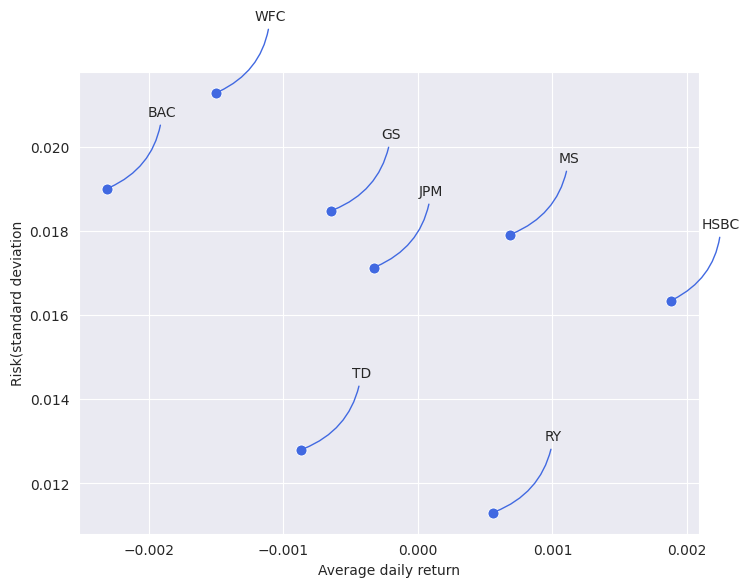

In [33]:
# further look at the risk

area = np.pi * 20
sns.set_style("darkgrid")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=bank_df_dr.mean(), y=bank_df_dr.std(), s=area, color = 'royalblue')
plt.xlabel('Average daily return')
plt.ylabel('Risk(standard deviation')

for label, x, y in zip(np.sort(bank_tickers), bank_df_dr.mean(), bank_df_dr.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='royalblue', connectionstyle='arc3,rad=-0.3')
    )


WFC and BAC underperforms the other major banks during the first quarter of 2023, with lower daily return and higher fluctuations. However, HSBC & RBC tends to outperform other North Amercian mega banks. 

### Monthly Return

In [35]:
# select close price from bank_df
bank_df_price = bank_df.iloc[:, 0:8]

# generate monthly return

bank_df_mr = bank_df_price.groupby([bank_df_price.index.year, bank_df_price.index.month]).tail(1).pct_change().dropna()

bank_df_mr

,Adj Close BAC,Adj Close GS,Adj Close HSBC,Adj Close JPM,Adj Close MS,Adj Close RY,Adj Close TD,Adj Close WFC
Date,,,,,,,,
2003-02-28,-0.011564,0.019824,-0.000745,-0.028277,-0.027705,0.076713,0.058189,-0.036497
2003-03-31,-0.025497,-0.019726,-0.014690,0.045414,0.040706,-0.015522,-0.005044,-0.007938
2003-04-30,0.107870,0.116597,0.069836,0.255492,0.173246,0.090610,0.064530,0.072683
2003-05-30,0.002025,0.073782,0.083745,0.119591,0.022346,0.028743,0.091140,0.007073
2003-06-30,0.074174,0.027607,-0.002700,0.040171,-0.065573,-0.009081,0.089936,0.043478
...,...,...,...,...,...,...,...,...
2022-11-30,0.050222,0.128218,0.191046,0.097712,0.132652,0.079053,0.042975,0.049333
2022-12-30,-0.119851,-0.110760,0.009721,-0.029527,-0.086494,-0.057727,-0.029667,-0.138895
2023-01-31,0.071256,0.065321,0.185494,0.051408,0.154023,0.099461,0.080551,0.135142


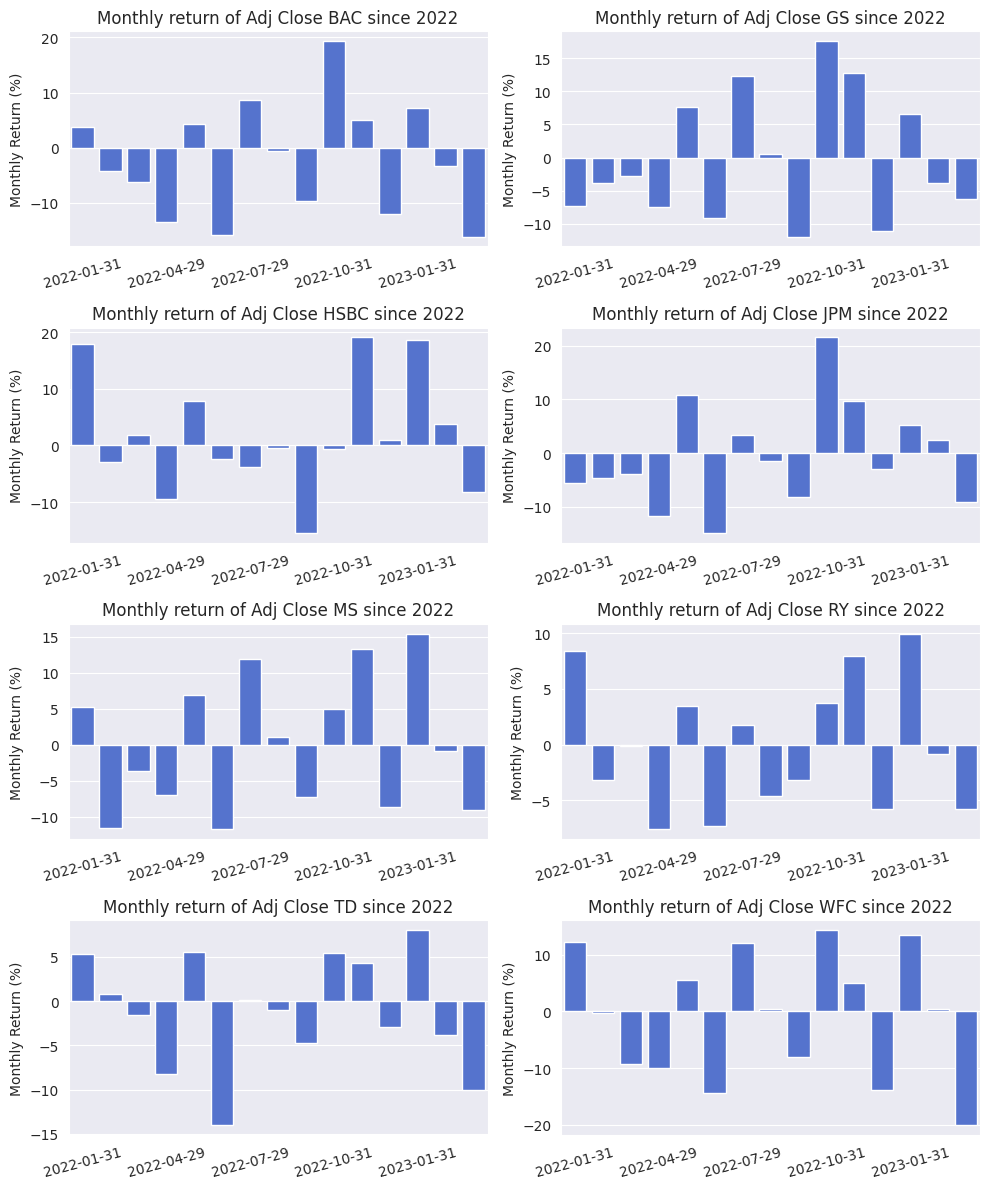

In [47]:
# plot monthly return 

plt.subplots(4, 2, figsize=(10,12))

for i, col in enumerate(bank_df_mr.columns, 1):
    plt.subplot(4,2,i)
    sns.barplot(x=bank_df_mr['2022-01-01':].index, y=bank_df_mr['2022-01-01':][col]*100, color='royalblue', label='Monthly Return')
    plt.xticks(range(0, len(bank_df_mr['2022-01-01':]), 3), bank_df_mr['2022-01-01':].index.date[::3], rotation = 15)
    plt.ylabel('Monthly Return (%)')
    plt.xlabel(None)
    plt.title(f'Monthly return of {col} since 2022')

plt.tight_layout()
plt.show()


### Yearly Return

In [49]:
# generate monthly return

bank_df_yr = bank_df_price.groupby([bank_df_price.index.year]).tail(1).pct_change().dropna()

bank_df_yr

,Adj Close BAC,Adj Close GS,Adj Close HSBC,Adj Close JPM,Adj Close MS,Adj Close RY,Adj Close TD,Adj Close WFC
Date,,,,,,,,
2004-12-31,0.215247,0.064915,0.125878,0.099520,-0.022459,0.169117,0.297257,0.089848
2005-12-30,0.024028,0.238828,-0.013792,0.057247,0.042606,0.514068,0.307016,0.044829
2006-12-29,0.207015,0.573932,0.188525,0.256392,0.459200,0.260119,0.160876,0.168235
2007-12-31,-0.188295,0.085920,-0.040368,-0.068761,-0.202865,0.106461,0.203061,-0.121644
2008-12-31,-0.630930,-0.604189,-0.380040,-0.251421,-0.688373,-0.393424,-0.467710,0.017104
2009-12-31,0.074810,1.025481,0.221611,0.343693,0.883014,0.891522,0.852933,-0.061888
2010-12-31,-0.111573,0.005425,-0.075460,0.023075,-0.073892,0.013407,0.226501,0.156227
2011-12-30,-0.581215,-0.455977,-0.221139,-0.199180,-0.439040,0.011724,0.040734,-0.095361
2012-12-31,1.098256,0.433920,0.457445,0.361806,0.279565,0.233216,0.168509,0.273464


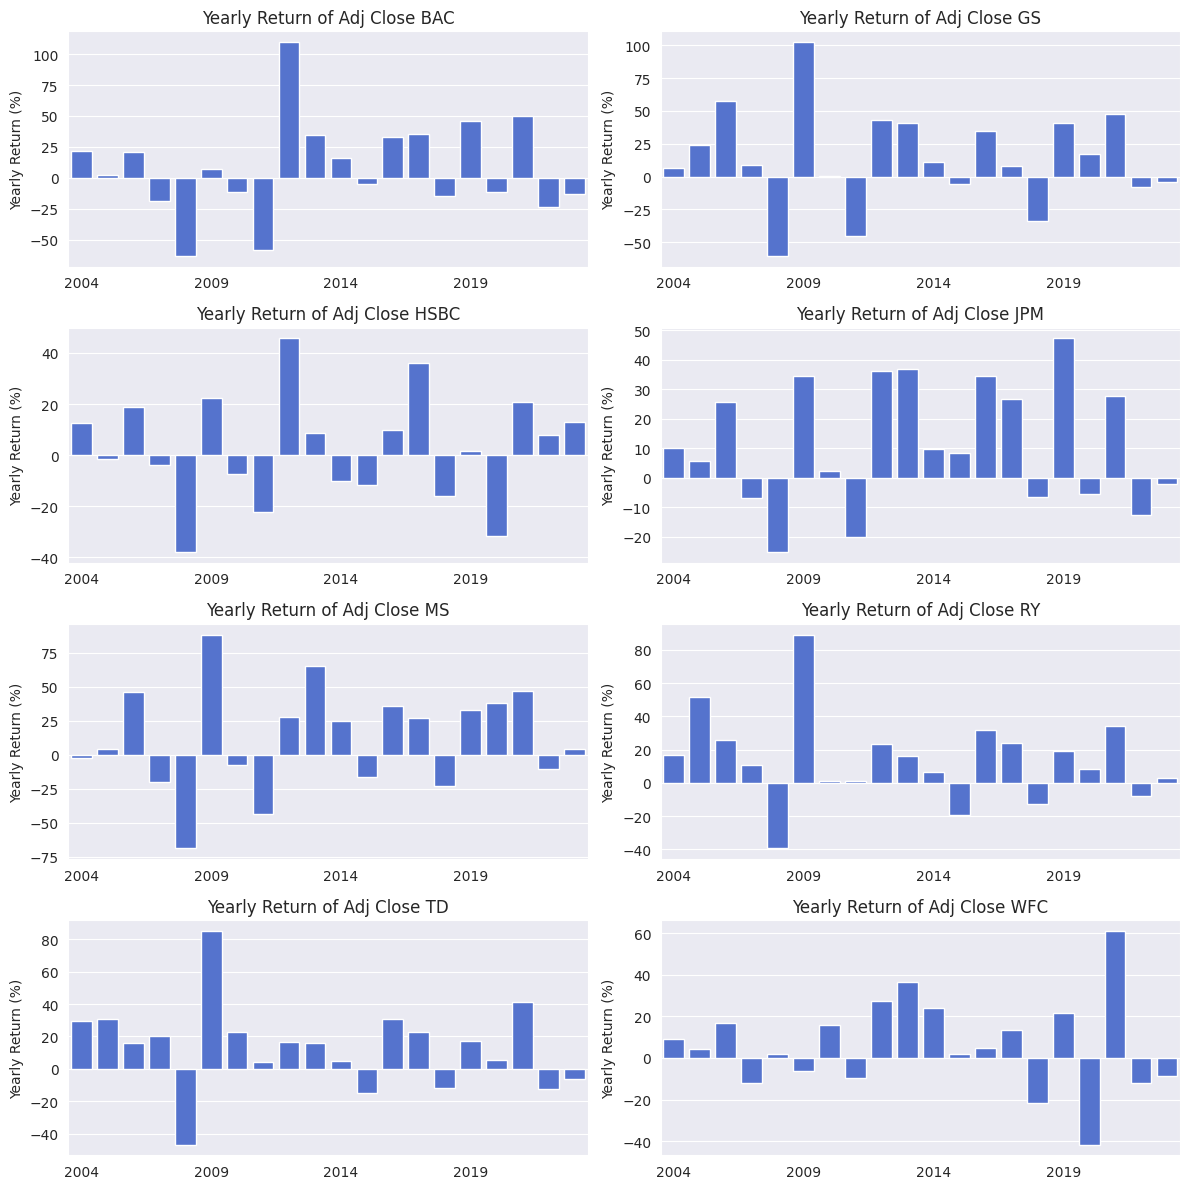

In [51]:
# plot yearly return 

plt.subplots(4, 2, figsize=(12,12))

for i, col in enumerate(bank_df_yr.columns, 1):
    plt.subplot(4,2,i)
    sns.barplot(x=bank_df_yr.index, y=bank_df_yr[col]*100, color='royalblue', label='Yearly Return')
    plt.xticks(range(0, len(bank_df_yr), 5), bank_df_yr.index.year[::5])
    plt.ylabel('Yearly Return (%)')
    plt.xlabel(None)
    plt.title(f'Yearly Return of {col}')

plt.tight_layout()
plt.show()

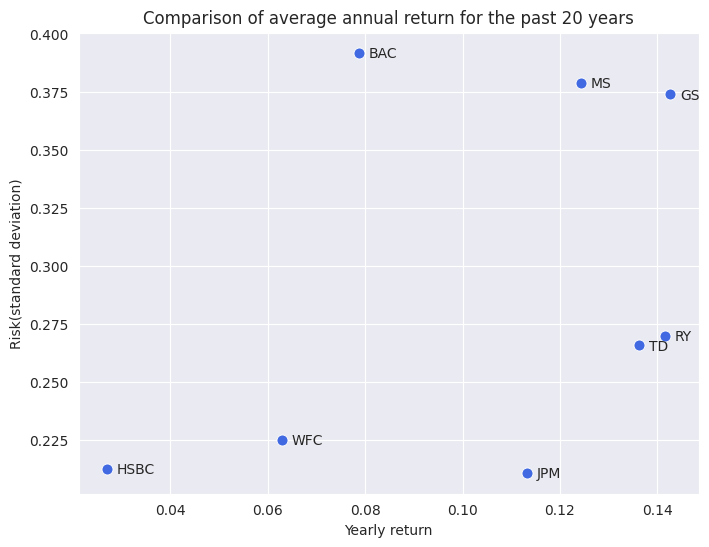

In [62]:
# further look at the risk

area = np.pi * 20

plt.figure(figsize=(8, 6))
sns.scatterplot(x=bank_df_yr.mean(), y=bank_df_yr.std(), s=area, color = 'royalblue')
plt.xlabel('Yearly return')
plt.ylabel('Risk(standard deviation)')
plt.title('Comparison of average annual return for the past 20 years')

for label, x, y in zip(np.sort(bank_tickers), bank_df_yr.mean(), bank_df_yr.std()):
    plt.annotate(label, xy=(x+0.002, y-0.002)
                 #  xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                #  arrowprops=dict(arrowstyle='-', color='royalblue', connectionstyle='arc3,rad=-0.3')
    )


For the past 20 years, JPM generates a relative higher return with lower risk, which outperforms other mega banks. 

## Comparison of yearly return among megabanks

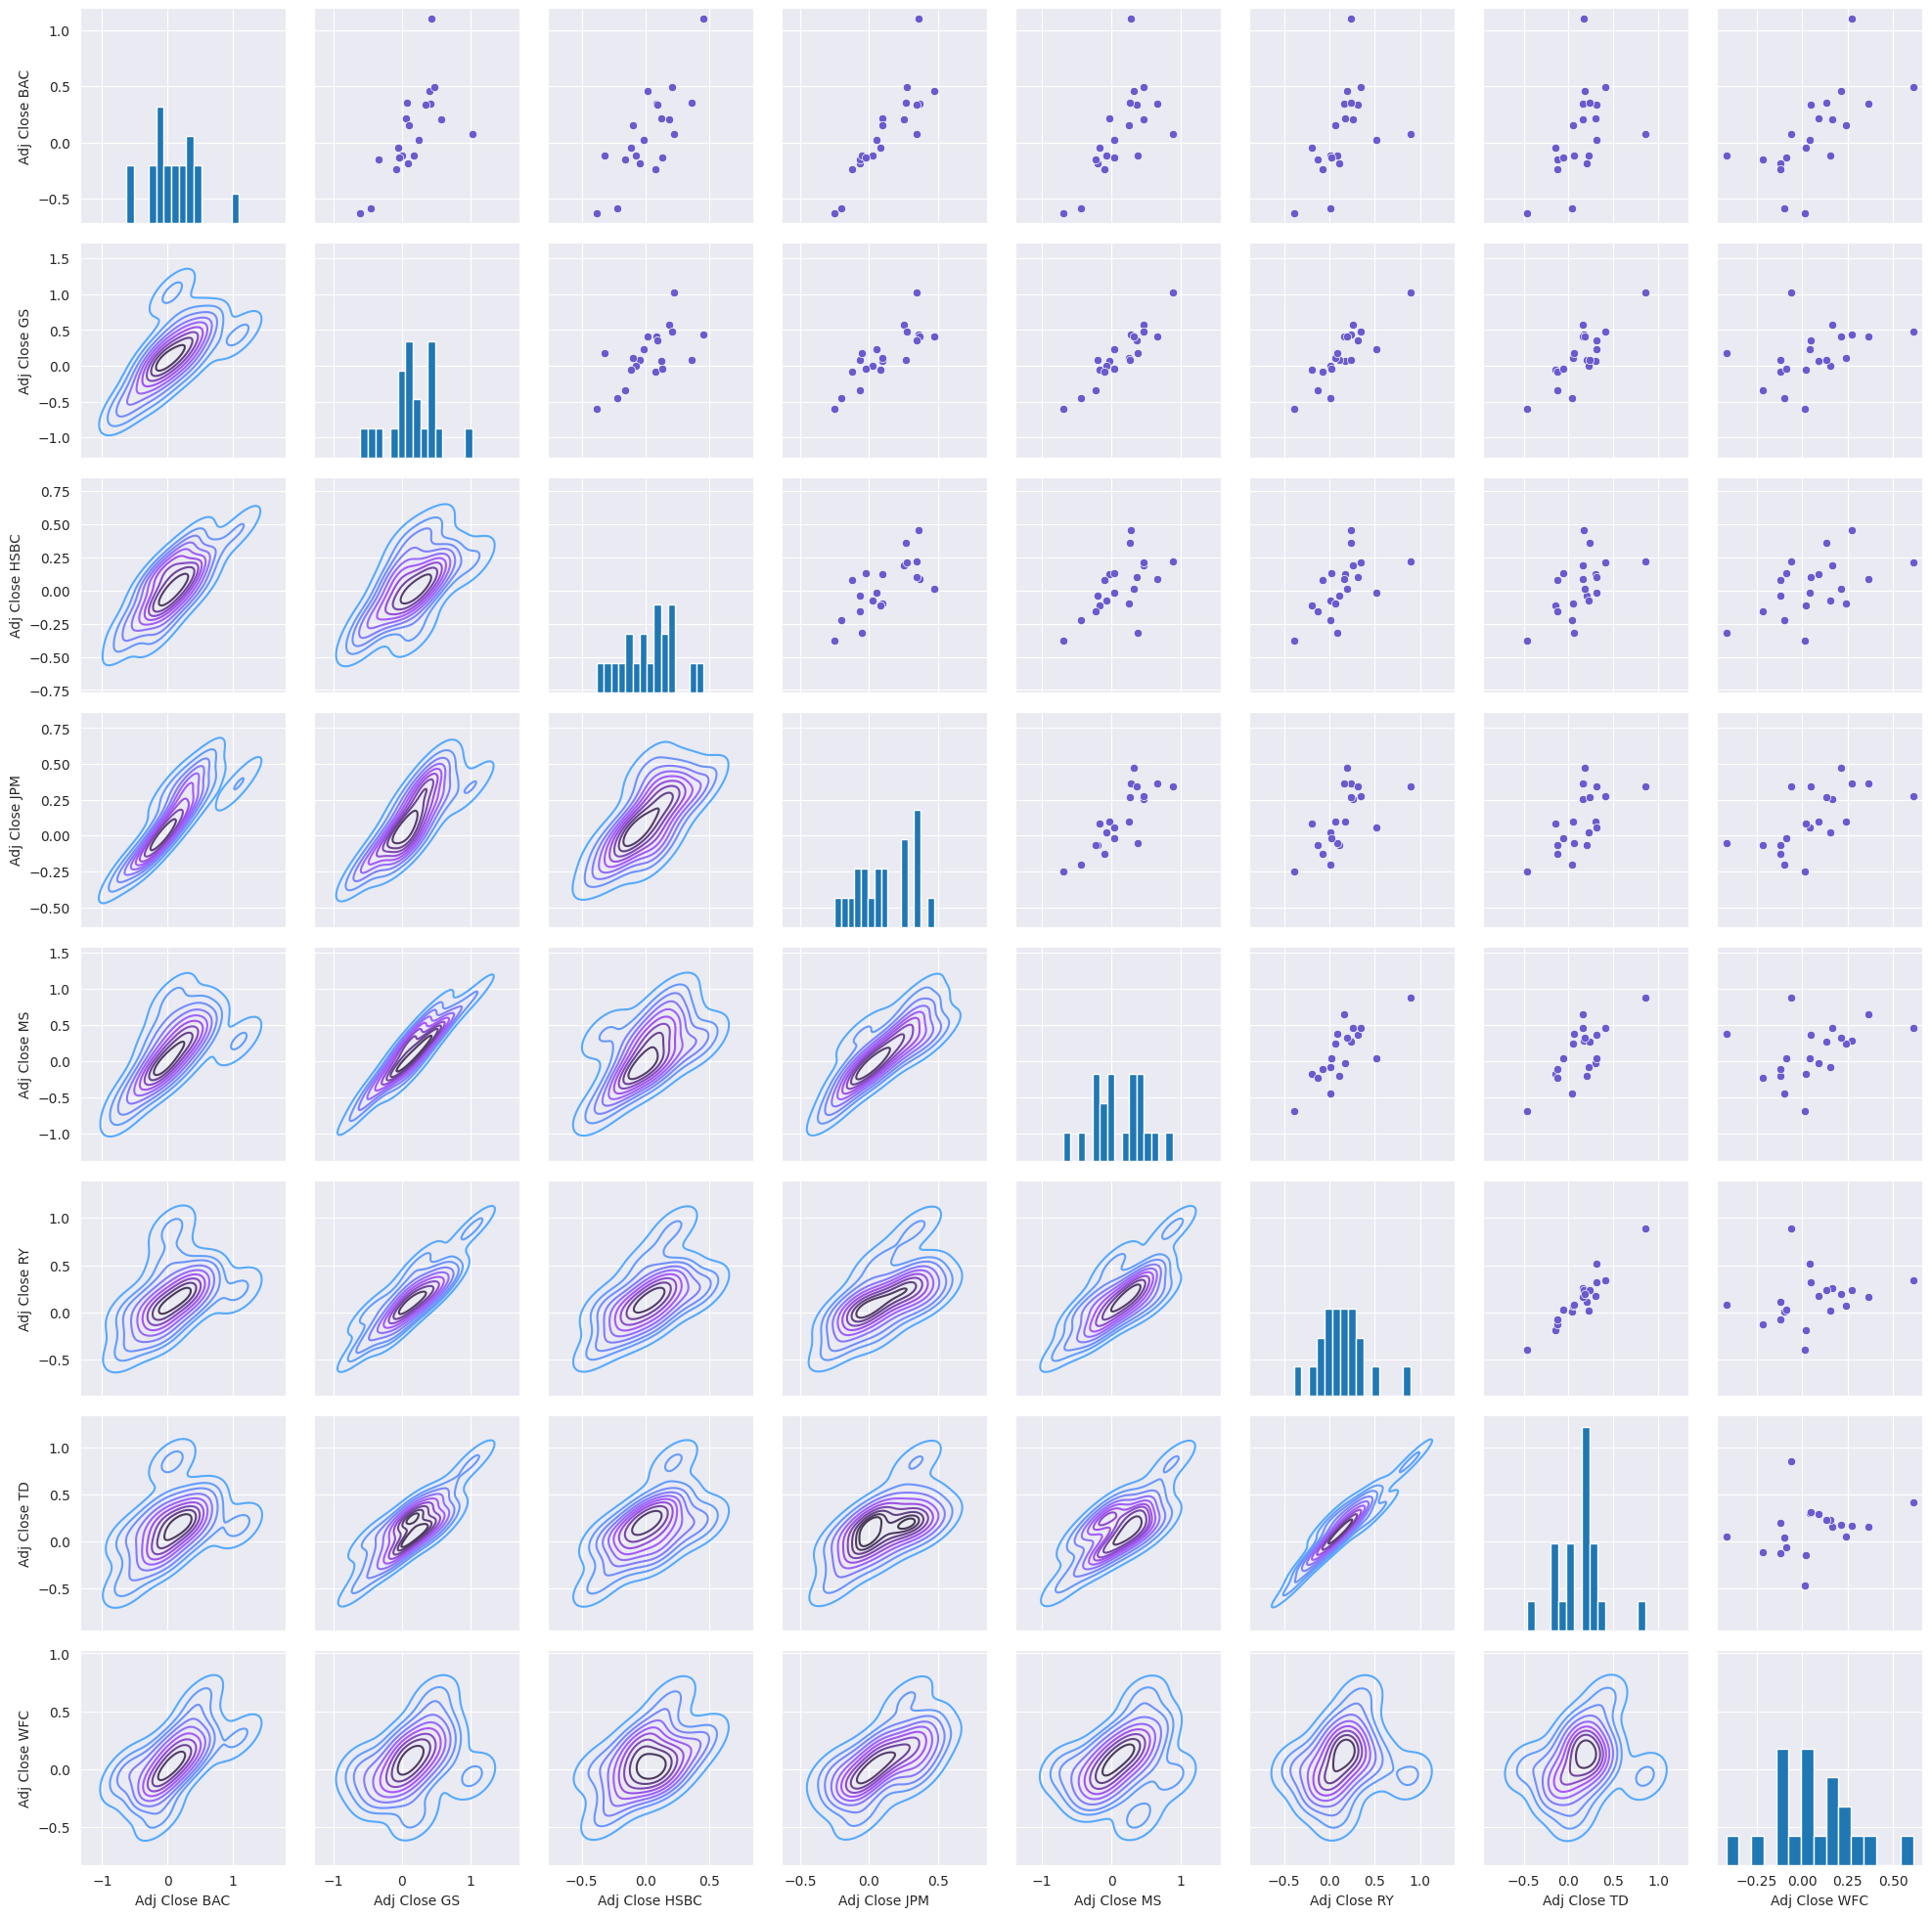

In [69]:
# create pairgrid
return_compare = sns.PairGrid(bank_df_yr)

# Upper triangle for scatter plot comparison
return_compare.map_upper(sns.scatterplot, color='slateblue')

# Lower triangle to plot kde
return_compare.map_lower(sns.kdeplot, cmap='cool_d')

# Diagonal for histogram plots of the yearly return
return_compare.map_diag(plt.hist, bins=15)


In the past 20 years, we have seen the strong correlation between two Canadian banks, RY and TD. Also, GS and MS indicate similar patterns in terms of yearly return. 

EDA Reference: [Stock Market Analysis by FARES SAYAH](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook#Data-Project---Stock-Market-Analysis)